In [105]:
#!pip3 install FlightRadarAPI
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install ipympl
!pip3 install dash

In [13]:
#!pip install wheel
#!pip install pipwin

#!pipwin install numpy
#!pipwin install pandas
#!pipwin install shapely
#!pipwin install gdal
#!pipwin install fiona
#!pipwin install pyproj
#!pipwin install six
#!pipwin install rtree
#!pipwin install geopandas

In [1]:
import pandas as pd
import geopandas as gp

In [2]:
from FlightRadar24.api import FlightRadar24API
fr_api = FlightRadar24API()

In [3]:
#create bounding box for flight area
bounds = '30.57,30.09,-97.98,-97.34'
#center of plot
my_coords = {'long':-99.6619, 'lat':30.3320}

In [4]:
#get flights
flights = fr_api.get_flights(bounds=bounds)

In [5]:
id_ls = []
for i in flights:
    id_ls.append(i.id)

In [7]:
#get flight details
dets = []
for fl_id in id_ls:
    dets.append(fr_api.get_flight_details(fl_id))

In [96]:
df_ls = []
for fl in dets:
    #create df from flight paths
    df = pd.DataFrame(fl['trail'])
    df['callsign'] = fl['identification']['callsign']
    
    try:
        df['airline'] = fl['airline']['name']
    except TypeError:
        df['airline'] = 'None'
        pass
    
    df['number'] = fl['identification']['number']['default']
    
    try:
        df['origin_iata'] = fl['airport']['origin']['code']['iata']
        df['origin_name'] = fl['airport']['origin']['name']
    except TypeError:
        df['origin_iata'] = 'None'
        df['origin_name'] = 'None'
    
    
    try:
        df['dest_iata'] = fl['airport']['destination']['code']['iata']
        df['dest_name'] = fl['airport']['destination']['name']
    except TypeError:
        df['dest_iata'] = 'None'
        df['dest_name'] = 'None'
        
    df['model'] = fl['aircraft']['model']['text']
    df_ls.append(df.head(5))

flt_df = pd.concat(df_ls).reset_index().rename(columns={'index':'old_idx'})
flt_df['mkr_size'] = flt_df['old_idx'].apply(lambda x: 1.5 if x == 0 else 0.25 )

In [98]:
#lat = y 
#long = x
flt_df['x'] = flt_df['lng'] - my_coords['long']
flt_df['y'] = flt_df['lat'] - my_coords['lat']
flt_df['z'] = flt_df['alt'] / 5280

In [100]:
import plotly.express as px

In [103]:
fig = px.scatter_3d(flt_df, x='x', y='y', z='z', hover_data=['alt', 'spd', 'hd', 'callsign', 'airline', 'number', 'origin_iata', 'origin_name', 'dest_iata', 'dest_name', 'model'], size='mkr_size', width=720, height=720 )

In [104]:
fig.show()

In [66]:
#!pip3 install ipympl
%matplotlib notebook
#matplotlib qt

In [20]:
#!pip3 install plotly

In [67]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


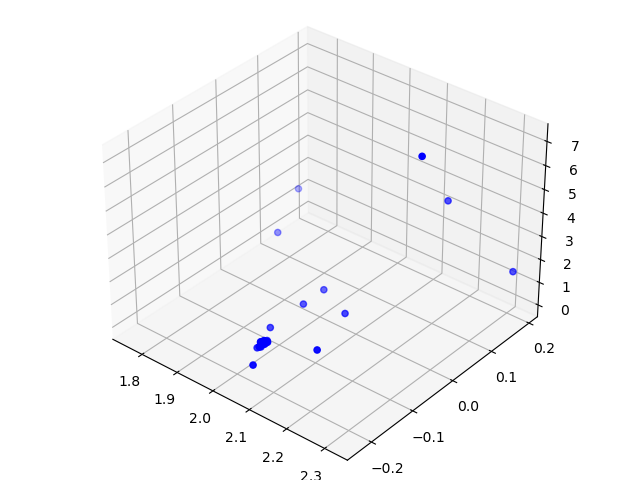

In [68]:
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

In [69]:
# creating the plot
ax.scatter(coord_df['x'].to_list(), coord_df['y'].to_list(), coord_df['z'].to_list(), color='blue')

In [70]:
# displaying the plot
plt.show()